## CE888 Lab8 Convolutional Neural Netowork
**Date**: 4 March 2019, Monday

In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [7]:
# add ssl certificate module to load minst dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Load Data

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

10567680/11490434 [==========================>...] - ETA: 0s

#### compile and fit model 

In [8]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 61s - loss: 0.1910 - acc: 0.9400 - val_loss: 0.0502 - val_acc: 0.9848
Epoch 2/5
48000/48000 [==============================] - 58s - loss: 0.0529 - acc: 0.9832 - val_loss: 0.0401 - val_acc: 0.9870
Epoch 3/5
48000/48000 [==============================] - 82s - loss: 0.0351 - acc: 0.9888 - val_loss: 0.0435 - val_acc: 0.9884
Epoch 4/5
48000/48000 [==============================] - 62s - loss: 0.0270 - acc: 0.9914 - val_loss: 0.0331 - val_acc: 0.9890
Epoch 5/5
48000/48000 [==============================] - 62s - loss: 0.0202 - acc: 0.9939 - val_loss: 0.0395 - val_acc: 0.9890


#### evaluate model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

 9888/10000 [============================>.] - ETA: 0s

0.9912

In [25]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

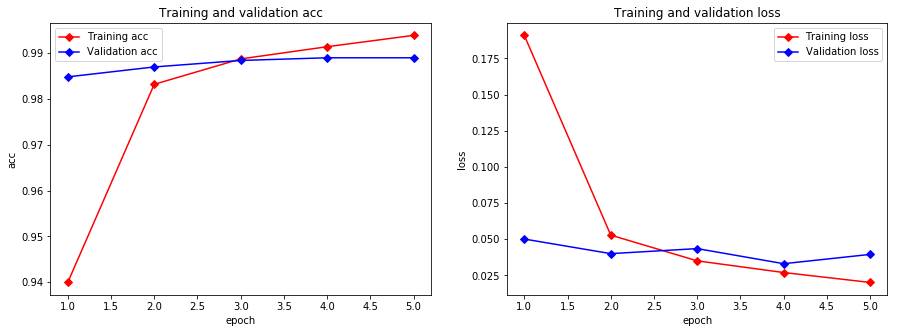

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig=plt.figure(figsize=(15,5))
for ev, val_ev, title, i in zip((acc, loss), (val_acc, val_loss), ("acc","loss"), (1,2)):      
    plt.subplot(1, 2, i)
    plt.plot(epochs, ev, 'r', marker="D", label='Training %s'% title)
    plt.plot(epochs, val_ev, 'b', marker="D", label='Validation %s'% title)
    plt.title('Training and validation %s'% title)
    plt.xlabel('epoch')
    plt.ylabel(title)
    plt.legend()
fig.show()

** Exercise:  **

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.